# Notebooks for Data Science!

1. **define analysis** (write code)
1. **run analysis** (run code)
1. **communicate results** (vis, blog)
1. **revise and repeat**


# What is a Jupyter Notebook?

## Jupyter Notebook: Web-based interactive environment

In [22]:
import time, sys
for i in range(13):
    time.sleep(0.1 * i)
    print(i, end=' ')
    sys.stdout.flush()

0 1 2 3 4 5 6 7 8 9 10 11 12 

In [23]:
import socket
socket.gethostname()

'Horus.local'

In [24]:
!pwd
!ls

/Users/minrk/Dropbox/Documents/Jupyter/pres/sf-analytics-2015
Jupyter.key             gutenberg               notebook-overview_files
Links.ipynb             jupyterhub-demo         overview.html
Untitled.ipynb          lorenz.ipynb            spark.ipynb
Untitled1.ipynb         notebook-overview.ipynb
Untitled2.ipynb         notebook-overview.md


In [25]:
import numpy as np
p = np.polynomial.Polynomial([1,2,3], [-10, 10])
p

Polynomial([ 1.,  2.,  3.], [-10.,  10.], [-1,  1])

Rich media support for output:

- latex
- jpeg/png/svg
- html+javascript


In [26]:
def poly_to_latex(p):
    """Render a numpy Polynomial object as a Latex expression"""
    terms = ['%.2g' % p.coef[0]]
    if len(p) > 1:
        term = 'x'
        c = p.coef[1]
        if c!=1:
            term = ('%.2g ' % c) + term
        terms.append(term)
    if len(p) > 2:
        for i in range(2, len(p)):
            term = 'x^%d' % i
            c = p.coef[i]
            if c!=1:
                term = ('%.2g ' % c) + term
            terms.append(term)
    px = '$P(x)=%s$' % '+'.join(terms)
    dom = r', $x \in [%.2g,\ %.2g]$' % tuple(p.domain)
    return px+dom

from IPython.display import Latex
Latex(poly_to_latex(p))

<IPython.core.display.Latex object>

Embed images:

### Interactive exploration with widgets

Factoring $x^n-1$ with [sympy](http://www.sympy.org/)

In [27]:
from IPython.html.widgets import interact
from IPython.display import display

from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')
x = Symbol('x')

@interact(n=(2,40))
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

 11               ⎛ 10    9    8    7    6    5    4    3    2        ⎞
x   - 1 = (x - 1)⋅⎝x   + x  + x  + x  + x  + x  + x  + x  + x  + x + 1⎠

Different widgets for different argument types:

In [28]:
from pprint import pprint

@interact(toggle=True, integer=5, fp=4.5, text="hello")
def show_args(**kwargs):
    pprint(kwargs)


{'fp': 7.6, 'integer': 12, 'text': 'hello, San Francisco', 'toggle': True}



### Input and output together with prose and maths

#### Maxwell's Equations

[ Maxwell's equations](http://es.wikipedia.org/wiki/Ecuaciones_de_Maxwell) govern electromagnetic fields.


\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{align}


This enables connecting mathematical analysis with implementation and illustration. For instance:

\begin{align}
e^{i \omega t} = \cos(\omega t) + i \sin(\omega t)
\end{align}

which we can illustrate visually by plotting the left- and right-hand side:

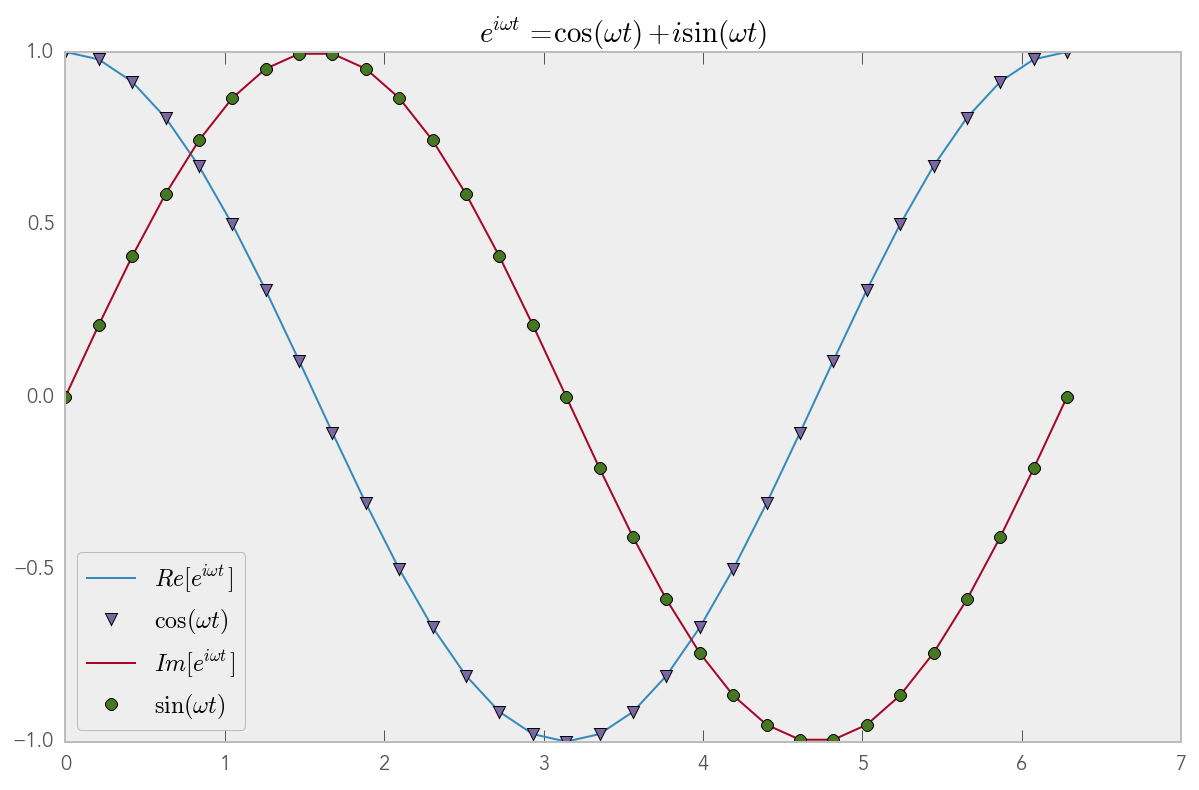

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np


@interact(ω=(0.1,10))
def illustrate_example(ω=1):
    t = np.linspace(0,2 * np.pi, 31 * ω)
    ωt = ω * t
    e_iωt = np.e ** (1j * ωt)

    plt.plot(ωt, e_iωt.real, label="$Re[e^{i \omega t}]$")
    plt.plot(ωt, np.cos(ωt), 'v', label="$\cos(\omega t)$")
    plt.plot(ωt, e_iωt.imag, label="$Im[e^{i \omega t}]$")
    plt.plot(ωt, np.sin(ωt), 'o', label="$\sin(\omega t)$")
    plt.title("$e^{i \omega t} = \cos(\omega t) + i \sin(\omega t)$")
    plt.legend(loc=0)

# Notebooks for data science

Two basic ways notebooks can help us do data science

## 1. Notebooks as *notebooks*

- **audience:** self, collaborators
- interactive scratchpad
- record of ideas and explorations
- messy


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.array([np.cumsum(np.random.random(1000) - 0.5) for i in range(3) ]).T

df = pd.DataFrame(data, columns=list('ABC'))
df.head()

,A,B,C
0,0.471302,-0.275832,-0.383300
1,0.351961,-0.112777,-0.467200
2,0.348015,0.107385,-0.637322
3,0.383269,0.374931,-0.264849
4,-0.052124,0.755260,-0.657309


In [11]:
df.mean()

A    9.125533
B    8.440871
C   -1.595482
dtype: float64

In [13]:
df.plot?

Signature: df.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
Docstring:
Make plots of DataFrame using matplotlib / pylab.

Parameters
----------
data : DataFrame
x : label or position, default None
y : label or position, default None
    Allows plotting of one column versus another
kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot
ax : matplotlib axes object, defau

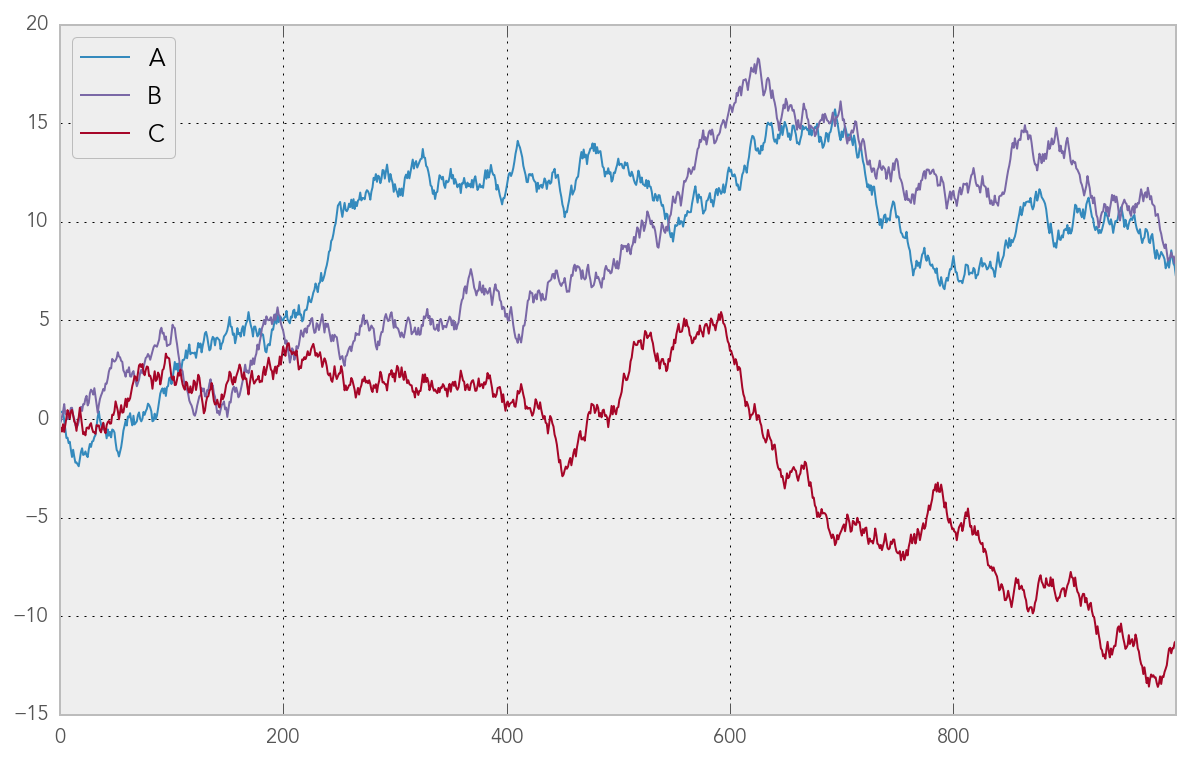

In [14]:
df.plot()

I know how to smooth a graph with a sliding window using `np.convolve`

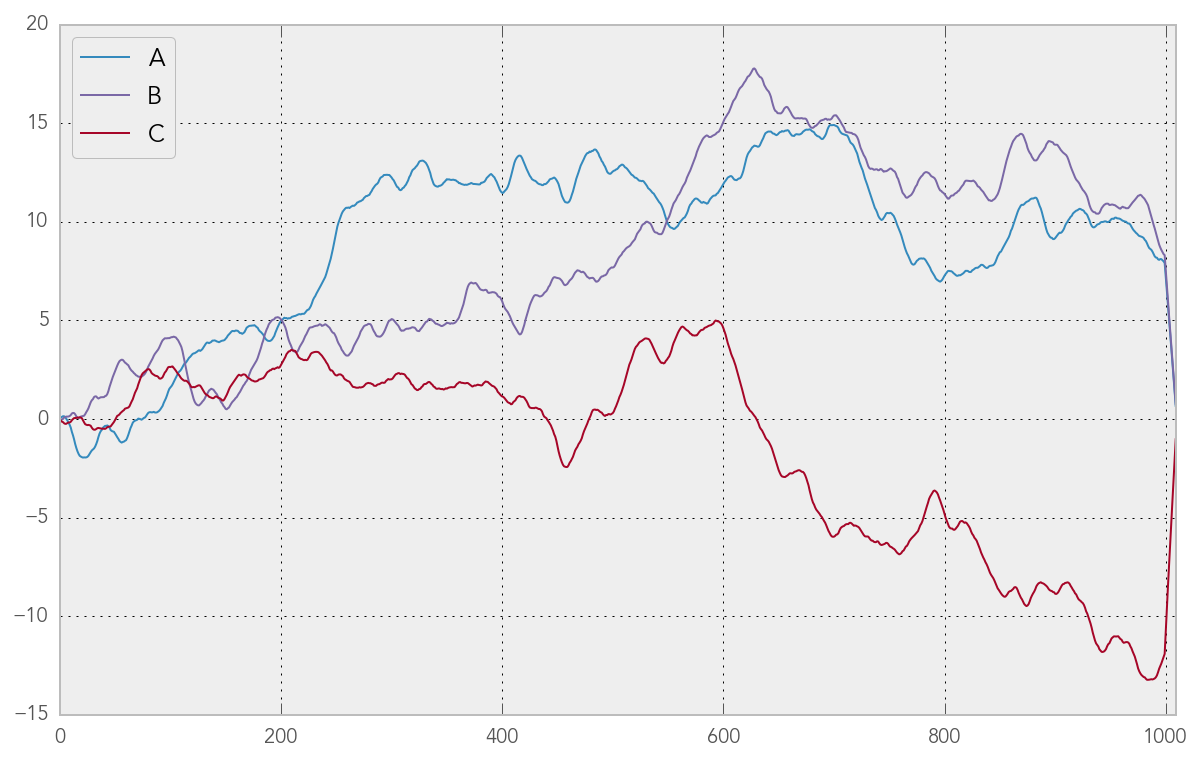

In [15]:
n = 11
window = np.ones(n)
A_smooth = np.convolve(df.A, window) / n
B_smooth = np.convolve(df.B, window) / n
C_smooth = np.convolve(df.C, window) / n
smooth_data = np.array([A_smooth, B_smooth, C_smooth]).T
df_smooth = pd.DataFrame(smooth_data,
    columns=list('ABC'))
df_smooth.plot()

In [ ]:
pd.r

In [72]:
pd.rolling_mean?

Docstring:
Moving mean.

Parameters
----------
arg : Series, DataFrame
window : int
    Size of the moving window. This is the number of observations used for
    calculating the statistic.
min_periods : int, default None
    Minimum number of observations in window required to have a value
    (otherwise result is NA).
freq : string or DateOffset object, optional (default None)
    Frequency to conform the data to before computing the statistic. Specified
    as a frequency string or DateOffset object.
center : boolean, default False
    Set the labels at the center of the window.
how : string, default 'None'
    Method for down- or re-sampling

Returns
-------
y : type of input argument

Notes
-----
By default, the result is set to the right edge of the window. This can be
changed to the center of the window by setting ``center=True``.

The `freq` keyword is used to conform time series data to a specified
frequency by resampling the data. This is done with the default parameters
of :

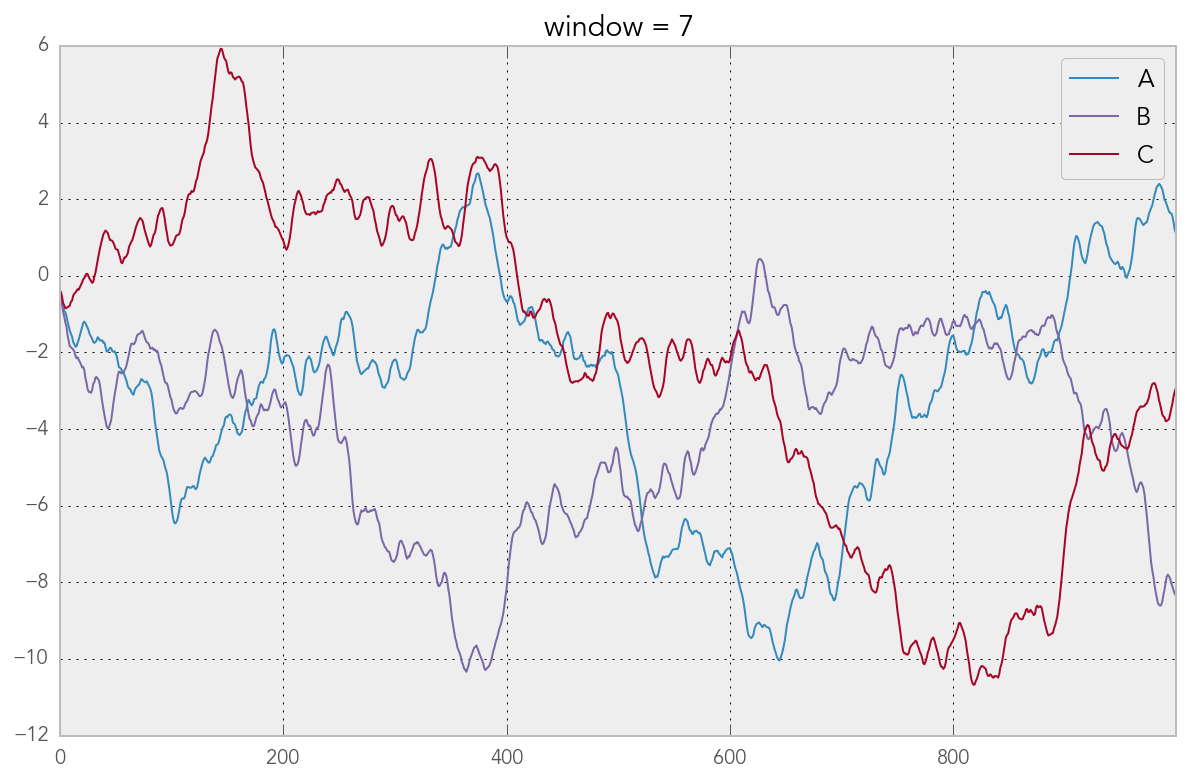

In [73]:
@interact
def plot_rolling_mean(window=(0,50)):
    pd.rolling_mean(df, window, min_periods=1).plot()
    plt.title("window = %i" % window)


## 2. Notebooks for communication

- **audience:** public
- Prepare analysis for public consumption
- Export to html or other format for distribution


Since notebooks contain input, output, and prose, they can provide a complete, reproducible narrative that describes and performs analysis. [nbviewer](http://nbviewer.org) provides on-demand HTML rendering of any notebook on the web.

## Success stories

- [Science](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#reproducible-academic-publications)
  - [Collaborative cloud-enabled tools allow rapid, reproducible biological insights](http://www.nature.com/ismej/journal/v7/n3/full/ismej2012123a.html)
- Blogging
  - [Jake Vanderplas](https://jakevdp.github.io/)
  - [Peter Norvig](http://nbviewer.ipython.org/url/norvig.com/ipython/TSPv3.ipynb)
  - [nikola](http://getnikola.com)
- [Books](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#entire-books-or-other-large-collections-of-notebooks-on-a-topic)
  - [Signal Processing](http://nbviewer.ipython.org/github/unpingco/Python-for-Signal-Processing/tree/master/)
  - [Bayesian Methods](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb)
- Journalism
  - [Scientific American](http://blogs.scientificamerican.com/sa-visual/visualizing-4-dimensional-asteroids1/)
  - [Five Thirty-Eight](http://nbviewer.ipython.org/github/brianckeegan/Bechdel/blob/master/Bechdel_test.ipynb)
  - [New York Times](https://twitter.com/13pt/statuses/324951796781043713) graphics:
    <blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr">That Kepler graphic was my first try using ipython+pandas and coffeescript+d3 in the same project. <a href="http://t.co/Dl4aFdC7AF">http://t.co/Dl4aFdC7AF</a></p>&mdash; Jonathan Corum (@13pt) <a href="https://twitter.com/13pt/status/324951796781043713">April 18, 2013</a></blockquote>

- [more...](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

By converting to standard formats such as HTML, latex, or markdown, Notebooks can be integrated into existing publication pipelines, for web or print.

# Exporting Notebooks

`nbconvert` is a tool for converting notebooks to other formats,
such as html, markdown, latex, and restructured text.
It is extensible and fully customizable via jinja templates.

In [37]:
!ipython nbconvert --to markdown "notebook-overview" 2>/dev/null
!head -n 24 notebook-overview.md


# Notebooks for Data Science!

1. **define analysis** (write code)
1. **run analysis** (run code)
1. **communicate results** (vis, blog)
1. **revise and repeat**


# What is a Jupyter Notebook?

## Jupyter Notebook: Web-based interactive environment


    import time, sys
    for i in range(13):
        time.sleep(0.1 * i)
        print(i, end=' ')
        sys.stdout.flush()

    0 1 2 3 4 5 6 7 8 9 10 11 12 


    import socket


In [31]:
!markdown "notebook-overview.md" > overview.html
display_html('<a href="overview.html" target=_blang>nb-md-html export</a>', raw=True)

nb-md-html export

In addition to nbconvert, the Jupyter community has developed
tools for authoring notebooks in other formats.

- **RMarkdown**
- [**ipymd**](https://github.com/rossant/ipymd): notebooks as markdown files, for O'Reilly Atlas.
- [**Notedown**](https://github.com/aaren/notedown): Like RMarkdown, for notebooks
- [**dexy**](http://dexy.it): workflow-based document construction

# Jupyter Services

- **[JupyterHub](https://demohub.jupyter.org)** - multi-user server
- **[tmpnb](https://try.jupyter.org)** - anonymous ephemeral notebooks
  - [codeneuro](http://notebooks.codeneuro.org/) - tmpnb instance for neuro data
- **[thebe](https://beta.oreilly.com/learning/data-visualization-with-seaborn)** - kernels without notebooks
- **[nbviewer](https://nbviewer.jupyter.org)** - rendered notebooks for sharing

In [32]:
%%html
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>